## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


### Hypothesis Generation

Make it a practice to do this before solving any ML problem. 
Ideally,before seeing the data or else, you might end up with biased hypotheses.

What could affect the target variable (sales)?

1. Time of week : Weekends usually are more busy
2. Time of day  : Higher sales in the mornings and late evenings
3. Time of year : Higher sales at end of the year 
4. Store size and location
5. Items with more shelf space

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [7]:
# For implementing Linear Regression
from sklearn.linear_model import LinearRegression

# Evaluation (to test the reliability of regression model)
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [8]:
train = pd.read_csv('bigmart_train.csv')

In [9]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## train.shape

In [11]:
train.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [15]:
train.Item_Weight.mean()

12.857645184136183

In [16]:
from matplotlib import pyplot as plt

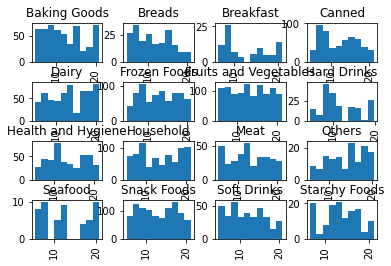

In [19]:
# plt.figure(figsize=(16,16))
train.hist('Item_Weight', by='Item_Type')
plt.show()

In [26]:
train[train.Item_Type == 'Dairy']['Item_Weight'].mean()

13.42606890459367

In [27]:
def fill_missing(cols):
    item_type = cols[0]
    item_weight = cols[1]
    if pd.isnull(item_weight):
        return train[train.Item_Type == item_type]['Item_Weight'].mean()
    else:
        return item_weight

In [28]:
train[['Item_Type', 'Item_Weight']].apply(fill_missing, axis=1)

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Length: 8523, dtype: float64

In [29]:
train.Item_Weight = train[['Item_Type', 'Item_Weight']].apply(fill_missing, axis=1)

<AxesSubplot:ylabel='Density'>

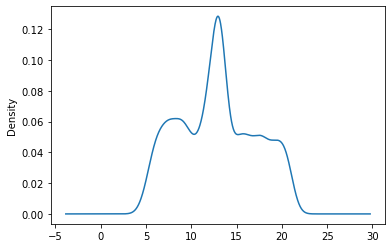

In [30]:
train['Item_Weight'].plot(kind='kde')

In [31]:
train.Outlet_Size

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [36]:
train.Outlet_Size.mode()[0]

'Medium'

In [37]:
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode()[0])

In [38]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [39]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [40]:
train.Item_Fat_Content = train.Item_Fat_Content.replace(['low fat', 'LF'], 'Low Fat')

In [41]:
train.Item_Fat_Content = train.Item_Fat_Content.replace(['reg'], 'Regular')

In [43]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [44]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [45]:
train['Age'] = 2021 - train.Outlet_Establishment_Year

In [46]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


<AxesSubplot:>

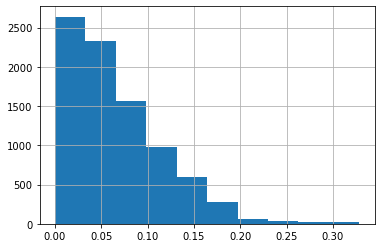

In [47]:
train['Item_Visibility'].hist()

<AxesSubplot:>

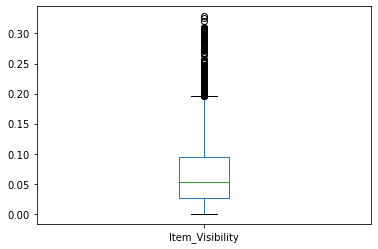

In [28]:
train['Item_Visibility'].plot(kind='box')

In [48]:
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)

In [49]:
IQR = Q3 - Q1

In [50]:
IQR

0.067595815

In [51]:
filt_train = train[(train.Item_Visibility >= (Q1 - 1.5*IQR)) & (train.Item_Visibility <= (Q3 + 1.5*IQR))]

In [52]:
((train.shape[0] - filt_train.shape[0])/train.shape[0])*100

1.689545934530095

In [53]:
filt_train.shape[0]

8379

In [54]:
train = filt_train.copy()
train.shape

(8379, 13)

In [55]:
train['Item_Visibility'].min(), train['Item_Visibility'].max()

(0.0, 0.195721125)

In [56]:
#creating a category
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], # Creating bins for visibility
                                       labels=['Low Viz', 'Viz', 'High Viz'], include_lowest=True)   # need to specify columns, bins and labels

In [57]:
train['Item_Visibility_bins']

0        Low Viz
1        Low Viz
2        Low Viz
3        Low Viz
4        Low Viz
          ...   
8518     Low Viz
8519     Low Viz
8520     Low Viz
8521    High Viz
8522     Low Viz
Name: Item_Visibility_bins, Length: 8379, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [58]:
train['Item_Visibility_bins'].value_counts()

Low Viz     4929
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8379 non-null   object  
 1   Item_Weight                8379 non-null   float64 
 2   Item_Fat_Content           8379 non-null   object  
 3   Item_Visibility            8379 non-null   float64 
 4   Item_Type                  8379 non-null   object  
 5   Item_MRP                   8379 non-null   float64 
 6   Outlet_Identifier          8379 non-null   object  
 7   Outlet_Establishment_Year  8379 non-null   int64   
 8   Outlet_Size                8379 non-null   object  
 9   Outlet_Location_Type       8379 non-null   object  
 10  Outlet_Type                8379 non-null   object  
 11  Item_Outlet_Sales          8379 non-null   float64 
 12  Age                        8379 non-null   int64   
 13  Item_Visibility_bins       8379 n

In [60]:
train = pd.get_dummies(train, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', \
                               'Outlet_Type', 'Item_Visibility_bins'])

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8379 non-null   object 
 1   Item_Weight                    8379 non-null   float64
 2   Item_Visibility                8379 non-null   float64
 3   Item_Type                      8379 non-null   object 
 4   Item_MRP                       8379 non-null   float64
 5   Outlet_Identifier              8379 non-null   object 
 6   Outlet_Establishment_Year      8379 non-null   int64  
 7   Item_Outlet_Sales              8379 non-null   float64
 8   Age                            8379 non-null   int64  
 9   Item_Fat_Content_Low Fat       8379 non-null   uint8  
 10  Item_Fat_Content_Regular       8379 non-null   uint8  
 11  Outlet_Size_High               8379 non-null   uint8  
 12  Outlet_Size_Medium             8379 non-null   u

In [62]:
cols_to_drop = ['Item_Identifier', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 
                'Outlet_Establishment_Year']

In [63]:
final_train = train.drop(cols_to_drop, axis=1)

In [64]:
final_train

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
0,9.300,249.8092,3735.1380,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,5.920,48.2692,443.4228,12,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.500,141.6180,2097.2700,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
3,19.200,182.0950,732.3800,23,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0
4,8.930,53.8614,994.7052,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,2778.3834,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
8519,8.380,108.1570,549.2850,19,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,85.1224,1193.1136,17,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
8521,7.210,103.1332,1845.5976,12,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1


In [65]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    8379 non-null   float64
 1   Item_MRP                       8379 non-null   float64
 2   Item_Outlet_Sales              8379 non-null   float64
 3   Age                            8379 non-null   int64  
 4   Item_Fat_Content_Low Fat       8379 non-null   uint8  
 5   Item_Fat_Content_Regular       8379 non-null   uint8  
 6   Outlet_Size_High               8379 non-null   uint8  
 7   Outlet_Size_Medium             8379 non-null   uint8  
 8   Outlet_Size_Small              8379 non-null   uint8  
 9   Outlet_Location_Type_Tier 1    8379 non-null   uint8  
 10  Outlet_Location_Type_Tier 2    8379 non-null   uint8  
 11  Outlet_Location_Type_Tier 3    8379 non-null   uint8  
 12  Outlet_Type_Grocery Store      8379 non-null   u

<AxesSubplot:>

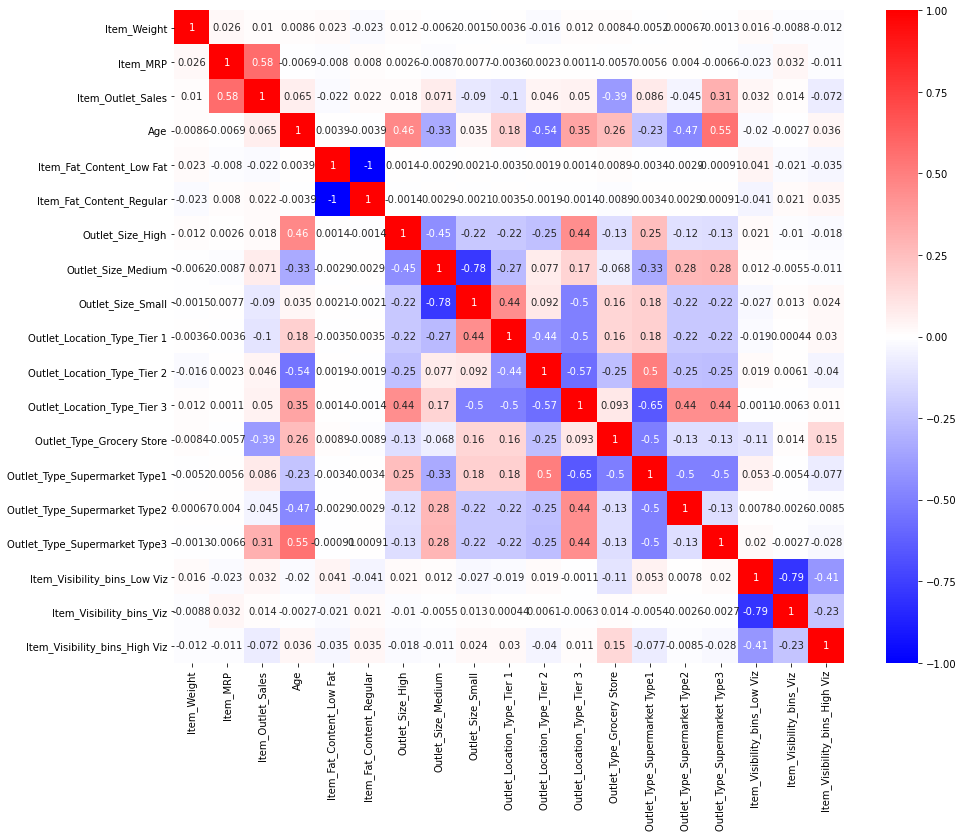

In [66]:
import seaborn as sns

plt.figure(figsize=(15,12))

correlation = final_train.corr()

sns.heatmap(correlation, cmap='bwr', annot=True)

In [67]:
correlation

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
Item_Weight,1.000000,0.026311,0.010205,0.008575,0.022684,-0.022684,0.011733,-0.006156,-0.001546,0.003605,-0.016048,0.012186,0.008403,-0.005228,0.000672,-0.001255,0.015712,-0.008767,-0.011977
Item_MRP,0.026311,1.000000,0.577367,-0.006896,-0.008048,0.008048,0.002599,-0.008736,0.007692,-0.003574,0.002252,0.001099,-0.005693,0.005560,0.004025,-0.006640,-0.022884,0.031707,-0.010818
Item_Outlet_Sales,0.010205,0.577367,1.000000,0.065382,-0.021670,0.021670,0.017882,0.071209,-0.090186,-0.103378,0.046018,0.050239,-0.390714,0.085544,-0.045038,0.308155,0.032108,0.013811,-0.071820
Age,0.008575,-0.006896,0.065382,1.000000,0.003918,-0.003918,0.463746,-0.331450,0.034974,0.183650,-0.539153,0.352141,0.263397,-0.232177,-0.466983,0.549453,-0.019777,-0.002664,0.035517
Item_Fat_Content_Low Fat,0.022684,-0.008048,-0.021670,0.003918,1.000000,-1.000000,0.001428,-0.002876,0.002130,-0.003463,0.001867,0.001368,0.008920,-0.003443,-0.002876,-0.000912,0.041436,-0.020990,-0.034765
Item_Fat_Content_Regular,-0.022684,0.008048,0.021670,-0.003918,-1.000000,1.000000,-0.001428,0.002876,-0.002130,0.003463,-0.001867,-0.001368,-0.008920,0.003443,0.002876,0.000912,-0.041436,0.020990,0.034765
Outlet_Size_High,0.011733,0.002599,0.017882,0.463746,0.001428,-0.001428,1.000000,-0.445201,-0.218320,-0.218320,-0.249614,0.440754,-0.125679,0.250756,-0.124849,-0.125378,0.020628,-0.010235,-0.017626
Outlet_Size_Medium,-0.006156,-0.008736,0.071209,-0.331450,-0.002876,0.002876,-0.445201,1.000000,-0.776634,-0.266756,0.076933,0.169983,-0.068021,-0.329008,0.280432,0.281620,0.011807,-0.005503,-0.010620
Outlet_Size_Small,-0.001546,0.007692,-0.090186,0.034974,0.002130,-0.002130,-0.218320,-0.776634,1.000000,0.444314,0.091764,-0.495334,0.162550,0.182155,-0.217793,-0.218716,-0.027380,0.013198,0.023974
Outlet_Location_Type_Tier 1,0.003605,-0.003574,-0.103378,0.183650,-0.003463,0.003463,-0.218320,-0.266756,0.444314,1.000000,-0.435440,-0.495334,0.162550,0.182155,-0.217793,-0.218716,-0.019241,0.000439,0.030032


In [68]:
X = final_train.drop('Item_Outlet_Sales', axis=1)
y = final_train['Item_Outlet_Sales']

In [69]:
X.shape, y.shape

((8379, 18), (8379,))

In [76]:
final_train

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
0,9.300,249.8092,3735.1380,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,5.920,48.2692,443.4228,12,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.500,141.6180,2097.2700,22,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
3,19.200,182.0950,732.3800,23,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0
4,8.930,53.8614,994.7052,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,2778.3834,34,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
8519,8.380,108.1570,549.2850,19,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,85.1224,1193.1136,17,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
8521,7.210,103.1332,1845.5976,12,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1


In [70]:
dc = dict()
for i in list(final_train.columns):
    dc[i] = i.replace(' ','_')

In [71]:
dc

{'Item_Weight': 'Item_Weight',
 'Item_MRP': 'Item_MRP',
 'Item_Outlet_Sales': 'Item_Outlet_Sales',
 'Age': 'Age',
 'Item_Fat_Content_Low Fat': 'Item_Fat_Content_Low_Fat',
 'Item_Fat_Content_Regular': 'Item_Fat_Content_Regular',
 'Outlet_Size_High': 'Outlet_Size_High',
 'Outlet_Size_Medium': 'Outlet_Size_Medium',
 'Outlet_Size_Small': 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1': 'Outlet_Location_Type_Tier_1',
 'Outlet_Location_Type_Tier 2': 'Outlet_Location_Type_Tier_2',
 'Outlet_Location_Type_Tier 3': 'Outlet_Location_Type_Tier_3',
 'Outlet_Type_Grocery Store': 'Outlet_Type_Grocery_Store',
 'Outlet_Type_Supermarket Type1': 'Outlet_Type_Supermarket_Type1',
 'Outlet_Type_Supermarket Type2': 'Outlet_Type_Supermarket_Type2',
 'Outlet_Type_Supermarket Type3': 'Outlet_Type_Supermarket_Type3',
 'Item_Visibility_bins_Low Viz': 'Item_Visibility_bins_Low_Viz',
 'Item_Visibility_bins_Viz': 'Item_Visibility_bins_Viz',
 'Item_Visibility_bins_High Viz': 'Item_Visibility_bins_High_Viz'}

In [72]:
train_new = final_train.rename(dc, axis=1)

In [77]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    8379 non-null   float64
 1   Item_MRP                       8379 non-null   float64
 2   Item_Outlet_Sales              8379 non-null   float64
 3   Age                            8379 non-null   int64  
 4   Item_Fat_Content_Low_Fat       8379 non-null   uint8  
 5   Item_Fat_Content_Regular       8379 non-null   uint8  
 6   Outlet_Size_High               8379 non-null   uint8  
 7   Outlet_Size_Medium             8379 non-null   uint8  
 8   Outlet_Size_Small              8379 non-null   uint8  
 9   Outlet_Location_Type_Tier_1    8379 non-null   uint8  
 10  Outlet_Location_Type_Tier_2    8379 non-null   uint8  
 11  Outlet_Location_Type_Tier_3    8379 non-null   uint8  
 12  Outlet_Type_Grocery_Store      8379 non-null   u

In [78]:
"Item_Outlet_Sales ~ " + " + ".join(list(train_new.drop('Item_Outlet_Sales', axis=1).columns))

'Item_Outlet_Sales ~ Item_Weight + Item_MRP + Age + Item_Fat_Content_Low_Fat + Item_Fat_Content_Regular + Outlet_Size_High + Outlet_Size_Medium + Outlet_Size_Small + Outlet_Location_Type_Tier_1 + Outlet_Location_Type_Tier_2 + Outlet_Location_Type_Tier_3 + Outlet_Type_Grocery_Store + Outlet_Type_Supermarket_Type1 + Outlet_Type_Supermarket_Type2 + Outlet_Type_Supermarket_Type3 + Item_Visibility_bins_Low_Viz + Item_Visibility_bins_Viz + Item_Visibility_bins_High_Viz'

In [79]:
formula = 'Item_Outlet_Sales ~ ' + ' + '.join(list(train_new.drop('Item_Outlet_Sales', axis=1).columns))

In [80]:
print(formula)

Item_Outlet_Sales ~ Item_Weight + Item_MRP + Age + Item_Fat_Content_Low_Fat + Item_Fat_Content_Regular + Outlet_Size_High + Outlet_Size_Medium + Outlet_Size_Small + Outlet_Location_Type_Tier_1 + Outlet_Location_Type_Tier_2 + Outlet_Location_Type_Tier_3 + Outlet_Type_Grocery_Store + Outlet_Type_Supermarket_Type1 + Outlet_Type_Supermarket_Type2 + Outlet_Type_Supermarket_Type3 + Item_Visibility_bins_Low_Viz + Item_Visibility_bins_Viz + Item_Visibility_bins_High_Viz


In [81]:
import statsmodels.formula.api as smf

lm = smf.ols(formula=formula, data=train_new).fit()

In [82]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     813.9
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:46:27   Log-Likelihood:                -70808.
No. Observations:                8379   AIC:                         1.416e+05
Df Residuals:                    8365   BIC:                         1.417e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       462.5095    131.138      3.527      0.000     205.446     719.573
Item_Weight                      -0.6196      2.916     -0.212      0.832      -6.336       5.097
Item_MRP                         15.7921      0.199     79.370      0.000      15.402      16.182
Age                             -40.0428     10.260     -3.903      0.000     -60.154     -19.931
Item_Fat_Content_Low_Fat        206.7770     66.820      3.095      0.002      75.793     337.761
Item_Fat_Content_Regular        255.7325     66.862      3.825      0.000     124.666     386.799
Outlet_Size_High                765.3142    210.644      3.633      0.000     352.400    1178.229
Outlet_Size_Medium             -189.1930     48.141     -3.930      0.000    -283.562     -94.824
Outlet_Size_Small              -113.6117     46.827     -2.426      0.015    -205.405     -21.819
Outlet_Location_Type_Tier_1     395.3001    110.306      3.584      0.000     179.072     611.528
Outlet_Location_Type_Tier_2     165.7046     57.721      2.871      0.004      52.557     278.852
Outlet_Location_Type_Tier_3     -98.4952     52.324     -1.882      0.060    -201.063       4.073
Outlet_Type_Grocery_Store     -1520.5529     67.564    -22.505      0.000   -1652.995   -1388.110
Outlet_Type_Supermarket_Type1   -79.2366     85.112     -0.931      0.352    -246.078      87.605
Outlet_Type_Supermarket_Type2  -313.2750     70.594     -4.438      0.000    -451.657    -174.893
Outlet_Type_Supermarket_Type3  2375.5739    197.569     12.024      0.000    1988.290    2762.857
Item_Visibility_bins_Low_Viz    164.4494     47.146      3.488      0.000      72.032     256.867
Item_Visibility_bins_Viz        161.8172     48.073      3.366      0.001      67.583     256.052
Item_Visibility_bins_High_Viz   136.2428     51.885      2.626      0.009      34.536     237.949
==============================================================================
Omnibus:                      909.878   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2167.653
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       5.131   Cond. No.                     2.28e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.91e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
trainX, testX, trainY, testY = train_test_split(X,y, test_size=0.3)

In [85]:
trainX.shape, testX.shape, trainY.shape, testY.shape

((5865, 18), (2514, 18), (5865,), (2514,))

In [86]:
lm = LinearRegression()

In [87]:
trainY

4085    2120.5730
6919    3193.8426
1597    1893.5352
6712    2600.6148
4301    3295.7100
          ...    
6910    2450.1440
7192    1267.0174
1571    2804.3496
2740    2797.6916
6132    5438.9202
Name: Item_Outlet_Sales, Length: 5865, dtype: float64

In [88]:
lm.fit(trainX, trainY)

LinearRegression()

In [89]:
lm.intercept_

1258.470569049593

In [90]:
lm.coef_

array([ 3.67385797e-01,  1.57089198e+01, -4.05042692e+01, -2.61898213e+01,
        2.61898213e+01,  5.80628160e+02, -3.42592739e+02, -2.38035421e+02,
        2.32343139e+02, -3.57881279e+00, -2.28764326e+02, -1.62088810e+03,
       -1.91094576e+02, -4.48471306e+02,  2.26045398e+03,  9.86145890e+00,
        1.06944800e+01, -2.05559389e+01])

In [91]:
trainX.columns

Index(['Item_Weight', 'Item_MRP', 'Age', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Visibility_bins_Low Viz', 'Item_Visibility_bins_Viz',
       'Item_Visibility_bins_High Viz'],
      dtype='object')

In [92]:
lm.score(trainX, trainY)

0.5604202895417438

In [93]:
lm.score(testX, testY)

0.5531544573238523

In [94]:
testY

3778    2050.6640
7507    2451.4756
1237    1379.5376
6882     223.7088
4785    5475.5392
          ...    
7271    1298.3100
6131    3277.0676
2951    2423.5120
5768    2708.4744
3660     559.2720
Name: Item_Outlet_Sales, Length: 2514, dtype: float64

In [95]:
predicted_y = lm.predict(testX)

In [96]:
predicted_y

array([2740.63370992, 2890.62096804, 2777.14666828, ..., 2700.31714244,
       2468.35932149, 2093.82192243])

# Dealing with Overfitting if that is the case !!

In [78]:
from sklearn.linear_model import Ridge, Lasso

In [79]:
ridge = Ridge()

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]} 

In [90]:
gscv = GridSearchCV(ridge, param_grid=parameters, cv=5, verbose=1)

In [91]:
gscv.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}, verbose=1)

In [92]:
gscv.best_params_['alpha']

0.1

In [93]:
gscv.best_score_

0.556512415988943

In [ ]:
ridge = Ridge(alpha=0.1)

In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(trainX, trainY)

In [ ]:
lasso.score(trainX, trainY)

In [ ]:
lasso.score(testX, testY)

In [ ]:
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]} 

In [ ]:
gscv = GridSearchCV(lasso, param_grid=parameters, cv=3)

In [ ]:
gscv.fit(trainX, trainY)

In [ ]:
gscv.best_params_['alpha']